In [1]:
!pip install tensorflow opencv-python matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 fr

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [45]:
import tensorflow as tf
import os

In [46]:
# Avoiding Out Of Memory errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU') #listing all the GPU's on our machine
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Loading The Dataset & Removing Dodgy Images

In [47]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import imghdr

In [48]:
data_dir = "C:\\Users\\lokis\\OneDrive\\Desktop\\Dataset"

In [49]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [14]:
#any image which has any other extension than the ones mentioned above will be removed
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [50]:
#loading the dataset using tensorflow API to build a pipeline
#this function has a batch size of 32 and resizes to (256,256)
data = tf.keras.utils.image_dataset_from_directory("C:\\Users\\lokis\\OneDrive\\Desktop\\Dataset")

Found 5856 files belonging to 2 classes.


In [51]:
data_iterator = data.as_numpy_iterator()

In [52]:
batch = data_iterator.next()

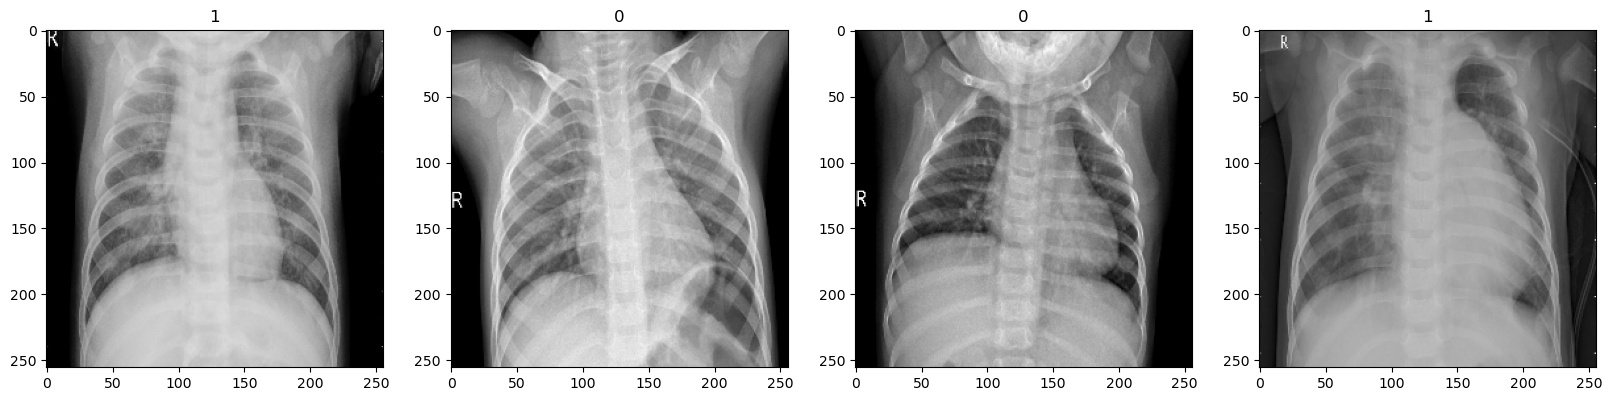

In [53]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [54]:
#0 will represent normal image cause of the structure of out dataset
#0= normal
#1=Pneumonia
class_labels = batch[1]
print(class_labels)


[1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0]


# Scaling The Data


In [55]:
data = data.map(lambda x,y: (x/255, y))

In [56]:
data.as_numpy_iterator().next()

(array([[[[2.01083794e-01, 2.01083794e-01, 2.01083794e-01],
          [1.95465684e-01, 1.95465684e-01, 1.95465684e-01],
          [2.19898894e-01, 2.19898894e-01, 2.19898894e-01],
          ...,
          [5.35723031e-01, 5.35723031e-01, 5.35723031e-01],
          [5.26884198e-01, 5.26884198e-01, 5.26884198e-01],
          [5.20136356e-01, 5.20136356e-01, 5.20136356e-01]],
 
         [[1.99938729e-01, 1.99938729e-01, 1.99938729e-01],
          [2.29568779e-01, 2.29568779e-01, 2.29568779e-01],
          [2.26983756e-01, 2.26983756e-01, 2.26983756e-01],
          ...,
          [5.37235737e-01, 5.37235737e-01, 5.37235737e-01],
          [5.27841628e-01, 5.27841628e-01, 5.27841628e-01],
          [5.41000307e-01, 5.41000307e-01, 5.41000307e-01]],
 
         [[2.01539516e-01, 2.01539516e-01, 2.01539516e-01],
          [2.24900424e-01, 2.24900424e-01, 2.24900424e-01],
          [2.10834101e-01, 2.10834101e-01, 2.10834101e-01],
          ...,
          [5.46250761e-01, 5.46250761e-01, 5.4625

# Splitting The Data

In [57]:
len(data)

183

In [58]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [59]:
train_size + test_size + val_size

182

In [60]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building The Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [62]:
model = Sequential()

In [63]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
 
model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Training The Model


In [66]:
logdir='logs'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


128/128 [==============================] - 45s 339ms/step - loss: 0.3511 - accuracy: 0.8560 - val_loss: 0.1870 - val_accuracy: 0.9219
Epoch 2/20
128/128 [==============================] - 39s 303ms/step - loss: 0.1518 - accuracy: 0.9412 - val_loss: 0.1679 - val_accuracy: 0.9288
Epoch 3/20
128/128 [==============================] - 40s 306ms/step - loss: 0.1286 - accuracy: 0.9521 - val_loss: 0.1883 - val_accuracy: 0.9253
Epoch 4/20
128/128 [==============================] - 40s 306ms/step - loss: 0.1180 - accuracy: 0.9563 - val_loss: 0.1625 - val_accuracy: 0.9340
Epoch 5/20
128/128 [==============================] - 40s 310ms/step - loss: 0.1111 - accuracy: 0.9595 - val_loss: 0.1309 - val_accuracy: 0.9549
Epoch 6/20
128/128 [==============================] - 40s 311ms/step - loss: 0.1039 - accuracy: 0.9651 - val_loss: 0.1397 - val_accuracy: 0.9358
Epoch 7/20
128/128 [==============================] - 40s 309ms/step - loss: 0.0762 - accuracy: 0.9744 - val_loss: 0.1581 - val_

# Performance Plotting 

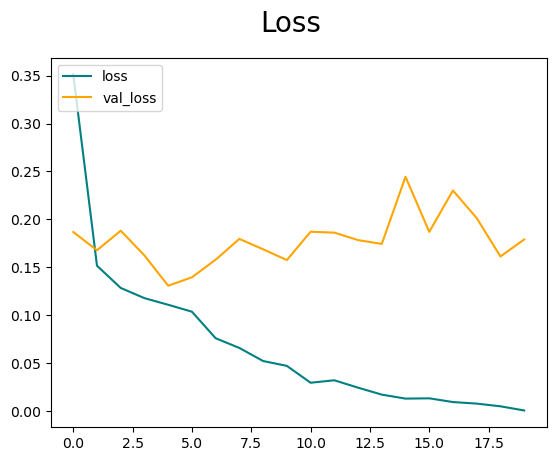

In [69]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

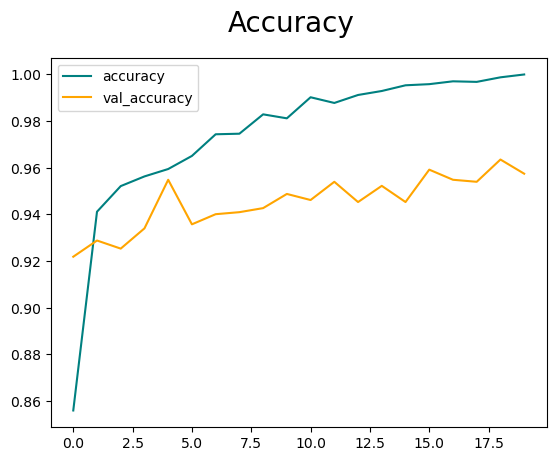

In [70]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation

In [71]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 67ms/step


In [76]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9688249230384827, Recall:0.964200496673584, Accuracy:0.9513888955116272


# Testing The Model

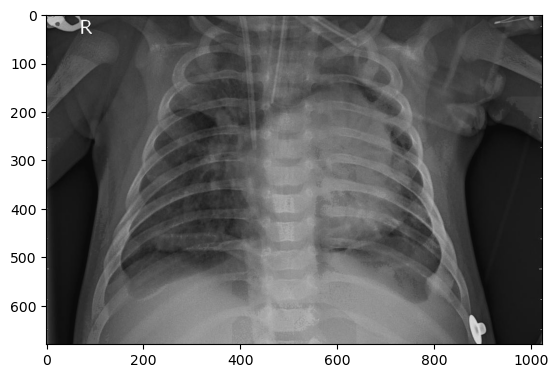

In [78]:
img = cv2.imread("C:\\Users\\lokis\\OneDrive\\Desktop\\Dataset\\pneumonia_test.jpeg")
plt.imshow(img)
plt.show()

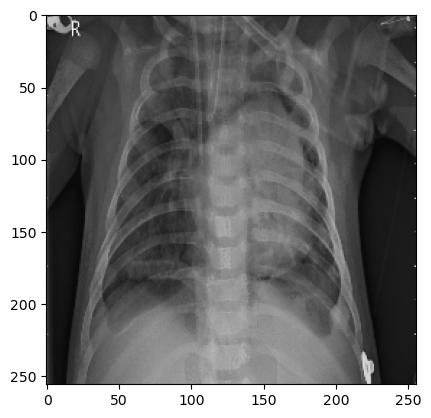

In [79]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [80]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 65ms/step


In [81]:
yhat

array([[1.]], dtype=float32)

In [82]:
if yhat > 0.5: 
    print(f'Predicted class is Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class is Pneumonia


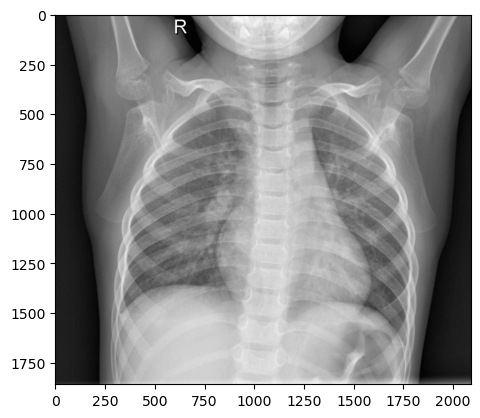

In [83]:
img = cv2.imread("C:\\Users\\lokis\\OneDrive\\Desktop\\Dataset\\test_normal.jpeg")
plt.imshow(img)
plt.show()

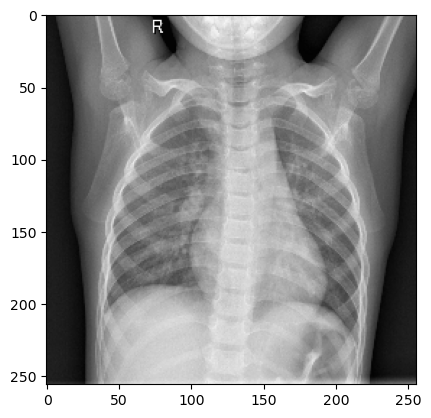

In [84]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [85]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 10ms/step


In [86]:
yhat

array([[4.1982908e-06]], dtype=float32)

In [87]:
if yhat > 0.5: 
    print(f'Predicted class is Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class is Normal


# Saving The Model

In [94]:
from keras.models import load_model

# Specify the absolute path to the model file
model_path = "C:\\Users\\lokis\\OneDrive\\Desktop\\Dataset\\imageclassifier.h5"

# Load the model
new_model = load_model(model_path)


In [95]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 60ms/step


array([[4.1982908e-06]], dtype=float32)